#Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset

In [2]:
wine_data = pd.read_csv('WineQT.csv')

# Check for missing values

In [3]:
missing_values = wine_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


# Display the distribution of each feature

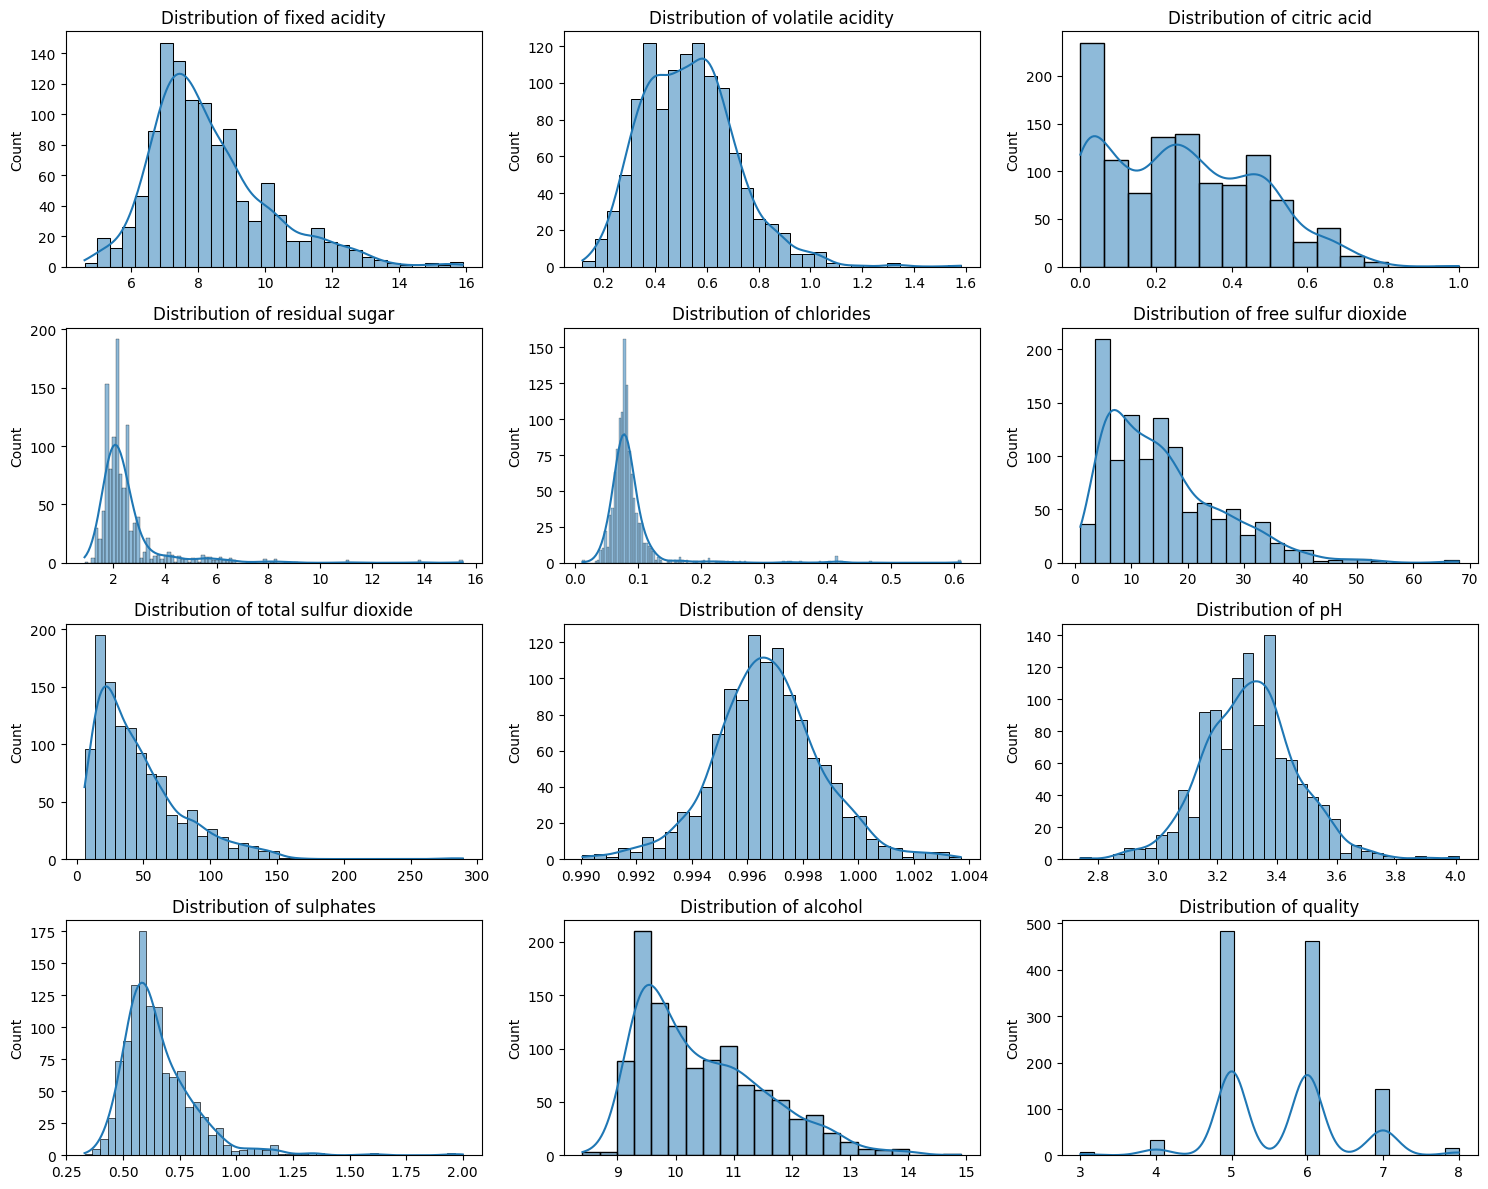

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(wine_data.columns[:-1]):  # Exclude the 'Id' column
    sns.histplot(wine_data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


# Correlation matrix

In [8]:
correlation_matrix = wine_data.corr()

# Plot the heatmap

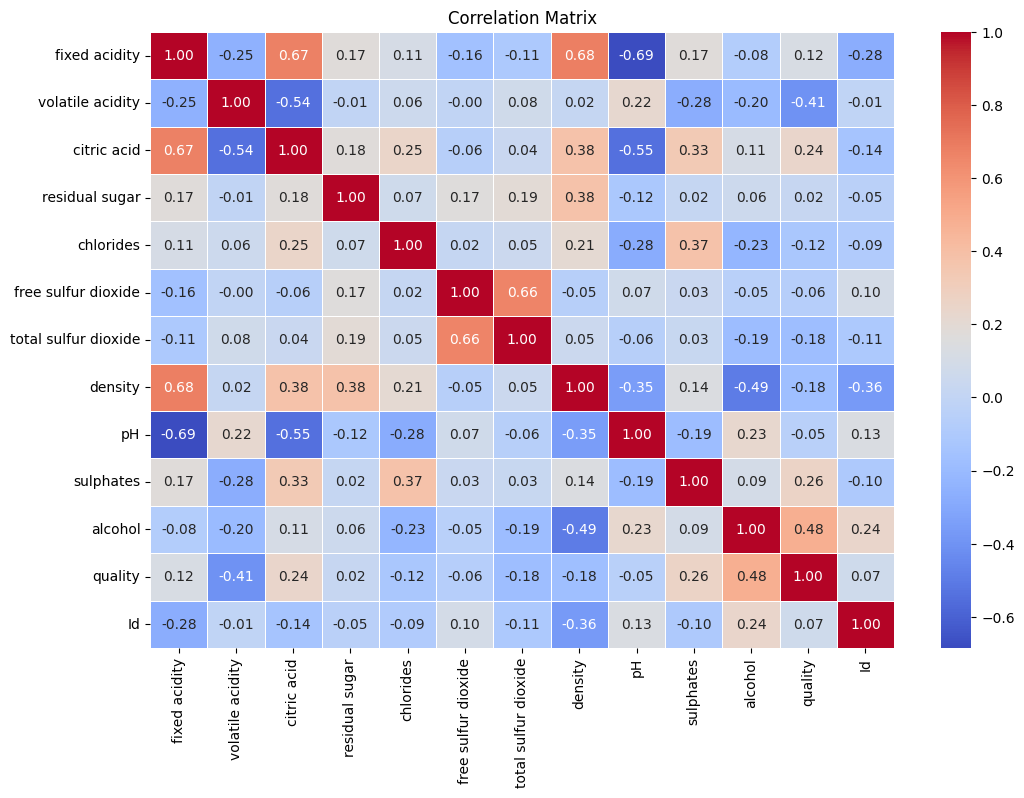

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Define the features and the target variable

In [10]:
X = wine_data.drop(columns=['quality', 'Id'])
y = wine_data['quality']


# Split the dataset into training and testing sets (80% train, 20% test)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train Random Forest

In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)


# Train Stochastic Gradient Descent

In [14]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train_scaled, y_train)
sgd_preds = sgd_model.predict(X_test_scaled)


# Train Support Vector Classifier

In [15]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)
svc_preds = svc_model.predict(X_test_scaled)


# Evaluate the models

In [17]:
print("Random Forest Classifier Report:\n", classification_report(y_test, rf_preds))
print("Stochastic Gradient Descent Classifier Report:\n", classification_report(y_test, sgd_preds))
print("Support Vector Classifier Report:\n", classification_report(y_test, svc_preds))

Random Forest Classifier Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229

Stochastic Gradient Descent Classifier Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        96
           6       0.53      0.24      0.33        99
           7       0.30      0.54      0.39        26
           8       0.00      0.00      0.00         2

    accuracy                           0.50      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# Select the best model based on evaluation metrics (for simplicity, assuming Random Forest is best here)

In [18]:
best_model = rf_model

# Function to predict wine quality

In [19]:
def predict_wine_quality(sample):
    sample_scaled = scaler.transform([sample])  # Scale the sample
    prediction = best_model.predict(sample_scaled)
    return prediction

# Usage of the prediction function

In [22]:
new_sample = [9.4, 0.70, 0.00, 1.9, 0.086, 11.0, 34.0, 0.9078, 3.51, 0.56, 9.4]
predicted_quality = predict_wine_quality(new_sample)
print("Predicted wine quality for the new sample:", predicted_quality[0])

Predicted wine quality for the new sample: 5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
